<a href="https://colab.research.google.com/github/adithi20/-CSE_Projects/blob/main/DIP(ASSIGNMENT_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

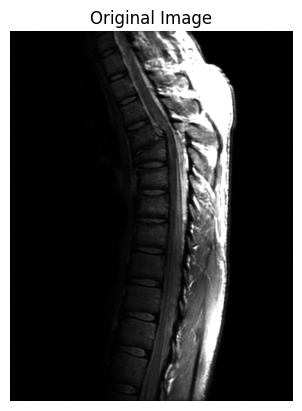

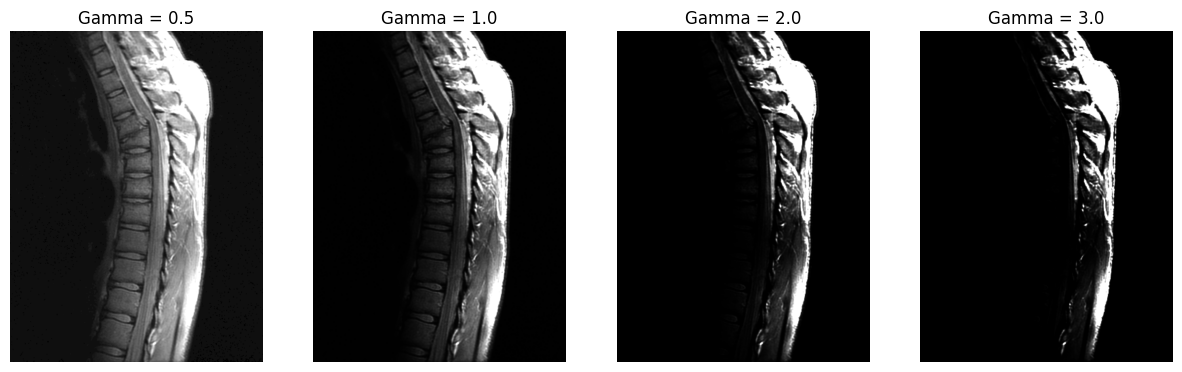

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def power_law_transform(image, gamma):
    # Normalizing the image
    image_normalized = image / 255.0
    # Applying power-law transformation
    transformed_image = np.power(image_normalized, gamma)
    # Denormalizing the image
    transformed_image = np.uint8(transformed_image * 255)
    return transformed_image

# Load the MRI image
img = np.array(Image.open('/content/prob1.tif'))

# Display original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Define different gamma values to test
gamma_values = [0.5, 1.0, 2.0, 3.0]

# Apply power-law transformation with different gamma values
fig, axes = plt.subplots(1, len(gamma_values), figsize=(15, 5))
for i, gamma in enumerate(gamma_values):
    transformed_img = power_law_transform(img, gamma)
    axes[i].imshow(transformed_img, cmap='gray')
    axes[i].set_title(f'Gamma = {gamma}')
    axes[i].axis('off')
plt.show()


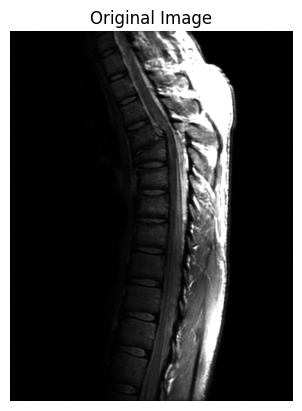

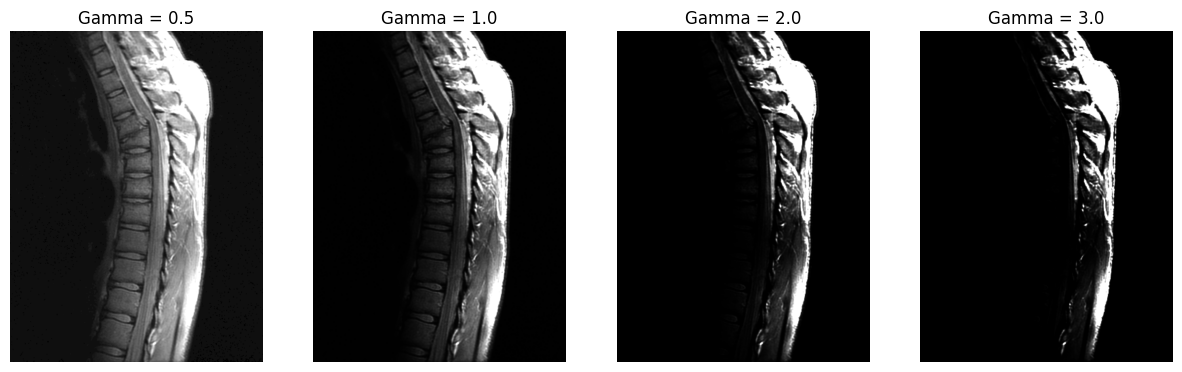

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Custom power function
def custom_power(x, gamma):
    return x ** gamma

# Custom normalization function
def custom_normalize(image):
    return image / 255.0

# Custom denormalization function
def custom_denormalize(image):
    return (image * 255).astype(np.uint8)

# Custom power-law transformation function
def custom_power_law_transform(image, gamma):
    # Normalize the image
    image_normalized = custom_normalize(image)
    # Apply power-law transformation
    transformed_image = custom_power(image_normalized, gamma)
    # Denormalize the image
    transformed_image = custom_denormalize(transformed_image)
    return transformed_image

# Load the MRI image
with open('/content/prob1.tif', 'rb') as f:
    img = np.array(Image.open(f))

# Display original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Define different gamma values to test
gamma_values = [0.5, 1.0, 2.0, 3.0]

# Apply power-law transformation with different gamma values
fig, axes = plt.subplots(1, len(gamma_values), figsize=(15, 5))
for i, gamma in enumerate(gamma_values):
    transformed_img = custom_power_law_transform(img, gamma)
    axes[i].imshow(transformed_img, cmap='gray')
    axes[i].set_title(f'Gamma = {gamma}')
    axes[i].axis('off')
plt.show()


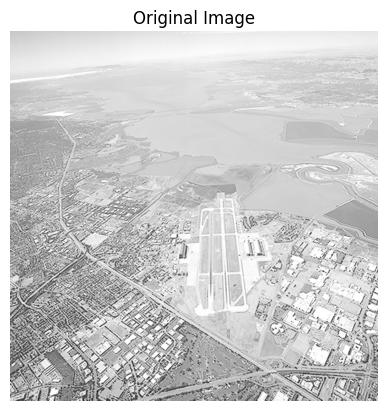

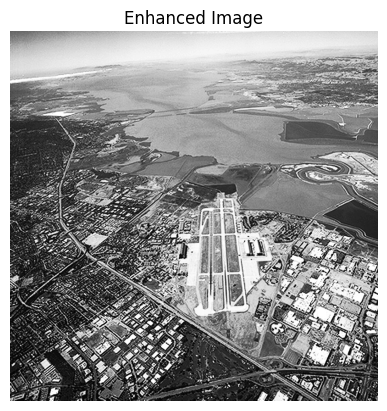

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Custom histogram equalization function
def custom_histogram_equalization(image):
    # Compute histogram
    histogram, _ = np.histogram(image.flatten(), bins=256, range=(0, 256))

    # Compute cumulative distribution function
    cdf = histogram.cumsum()
    cdf_normalized = cdf / float(cdf.max())

    # Apply histogram equalization
    equalized_image = np.interp(image.flatten(), range(256), cdf_normalized * 255).reshape(image.shape)

    return equalized_image.astype(np.uint8)

# Custom contrast stretching function
def custom_contrast_stretching(image, r1=0, s1=0, r2=255, s2=255):
    # Check for division by zero
    if r1 == r2:
        return image

    # Initialize the stretched image
    stretched_image = np.zeros_like(image)

    # Compute scaling factors
    a1 = s1 / (r1 if r1 != 0 else 1)
    a2 = (s2 - s1) / (r2 - r1)

    # Handle division by zero for a3
    if r2 == 255:
        a3 = 0
    else:
        a3 = (255 - s2) / (255 - r2)

    # Apply contrast stretching
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] < r1:
                stretched_image[i, j] = a1 * image[i, j]
            elif image[i, j] < r2:
                stretched_image[i, j] = a2 * (image[i, j] - r1) + s1
            else:
                stretched_image[i, j] = a3 * (image[i, j] - r2) + s2

    return stretched_image.astype(np.uint8)

# Custom transformation function to enhance details
def custom_detail_enhancement(image):
    # Apply histogram equalization
    equalized_image = custom_histogram_equalization(image)

    # Apply contrast stretching
    stretched_image = custom_contrast_stretching(equalized_image)

    return stretched_image

# Load the washed-out aerial image
with open('/content/prob2.tif', 'rb') as f:
    img = np.array(Image.open(f))

# Display original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply detail enhancement transformation
enhanced_img = custom_detail_enhancement(img)

# Display enhanced image
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')
plt.show()



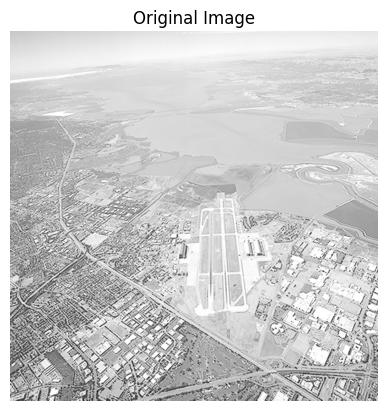

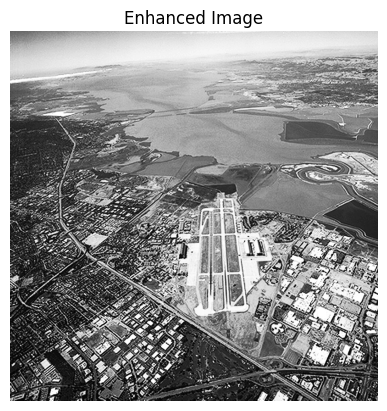

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Custom histogram equalization function
def custom_histogram_equalization(image):
    # Compute histogram
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i, j]] += 1

    # Compute cumulative distribution function
    cdf = np.zeros(256)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]
    cdf_normalized = cdf / float(cdf.max())

    # Apply histogram equalization
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i, j] = cdf_normalized[image[i, j]] * 255

    return equalized_image.astype(np.uint8)

# Custom contrast stretching function
def custom_contrast_stretching(image, r1=0, s1=0, r2=255, s2=255):
    # Check for division by zero
    if r1 == r2:
        return image

    # Initialize the stretched image
    stretched_image = np.zeros_like(image)

    # Compute scaling factors
    if r1 != 0:
        a1 = s1 / r1
    else:
        a1 = 0
    a2 = (s2 - s1) / (r2 - r1)
    if r2 != 255:
        a3 = (255 - s2) / (255 - r2)
    else:
        a3 = 0

    # Apply contrast stretching
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] < r1:
                stretched_image[i, j] = a1 * image[i, j]
            elif image[i, j] < r2:
                stretched_image[i, j] = a2 * (image[i, j] - r1) + s1
            else:
                stretched_image[i, j] = a3 * (image[i, j] - r2) + s2

    return stretched_image.astype(np.uint8)

# Custom transformation function to enhance details
def custom_detail_enhancement(image):
    # Apply histogram equalization
    equalized_image = custom_histogram_equalization(image)

    # Apply contrast stretching
    stretched_image = custom_contrast_stretching(equalized_image)

    return stretched_image

# Load the washed-out aerial image
with open('/content/prob2.tif', 'rb') as f:
    img = np.array(Image.open(f))

# Display original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply detail enhancement transformation
enhanced_img = custom_detail_enhancement(img)

# Display enhanced image
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')
plt.show()


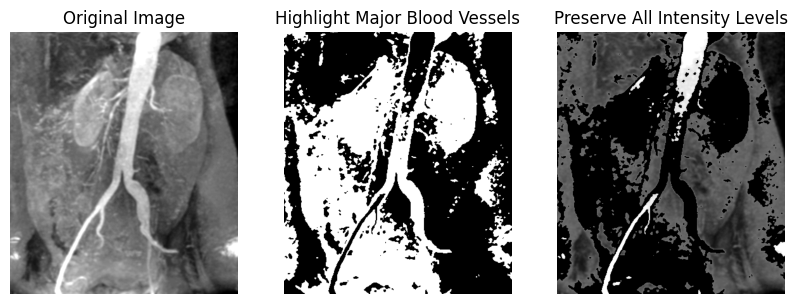

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
with open('/content/prob3.tif', 'rb') as f:
    img = np.array(Image.open(f))

# Define intensity-level slicing functions
def highlight_blood_vessels(img, low_threshold, high_threshold, highlight=False):
    sliced_img = np.copy(img)
    if highlight:
        sliced_img[(img >= low_threshold) & (img <= high_threshold)] = 255
        sliced_img[(img < low_threshold) | (img > high_threshold)] = 0
    else:
        sliced_img[(img >= low_threshold) & (img <= high_threshold)] = 0
    return sliced_img

# Plot original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Intensity-level slicing to highlight major blood vessels and remove other parts
highlighted_img = highlight_blood_vessels(img, 100, 200, highlight=True)
plt.subplot(1, 3, 2)
plt.imshow(highlighted_img, cmap='gray')
plt.title('Highlight Major Blood Vessels')
plt.axis('off')

# Intensity-level slicing to highlight major blood vessels and preserve other parts
preserved_img = highlight_blood_vessels(img, 100, 200, highlight=False)
plt.subplot(1, 3, 3)
plt.imshow(preserved_img, cmap='gray')
plt.title('Preserve All Intensity Levels')
plt.axis('off')

plt.show()


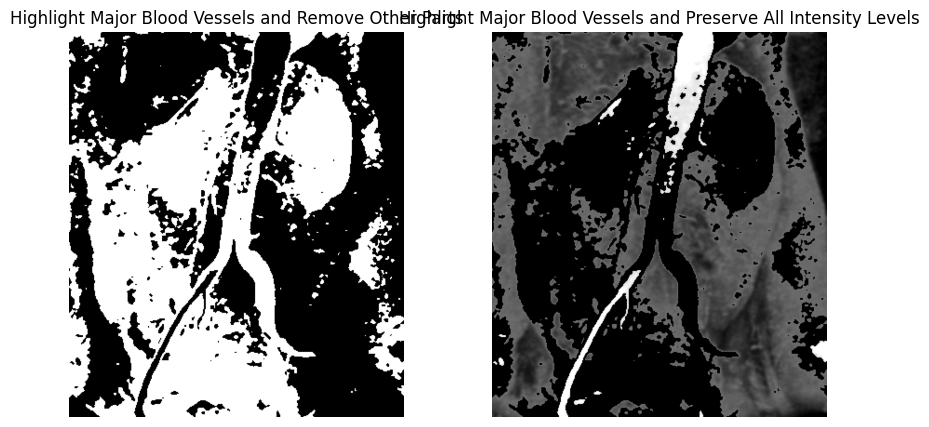

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
with open('/content/prob3.tif', 'rb') as f:
    img = np.array(Image.open(f))

# Define intensity-level slicing functions
def highlight_blood_vessels(img, low_threshold, high_threshold, highlight=True):
    sliced_img = np.copy(img)
    if highlight:
        sliced_img[(img >= low_threshold) & (img <= high_threshold)] = 255
        sliced_img[(img < low_threshold) | (img > high_threshold)] = 0
    else:
        sliced_img[(img >= low_threshold) & (img <= high_threshold)] = 0
    return sliced_img

# Plot original image
plt.figure(figsize=(10, 5))

# Task (a): Highlight major blood vessels and remove other parts
highlighted_img_a = highlight_blood_vessels(img, 100, 200, highlight=True)
plt.subplot(1, 2, 1)
plt.imshow(highlighted_img_a, cmap='gray')
plt.title('Highlight Major Blood Vessels and Remove Other Parts')
plt.axis('off')

# Task (b): Highlight major blood vessels and preserve all other intensity levels
highlighted_img_b = highlight_blood_vessels(img, 100, 200, highlight=False)
plt.subplot(1, 2, 2)
plt.imshow(highlighted_img_b, cmap='gray')
plt.title('Highlight Major Blood Vessels and Preserve All Intensity Levels')
plt.axis('off')

plt.show()


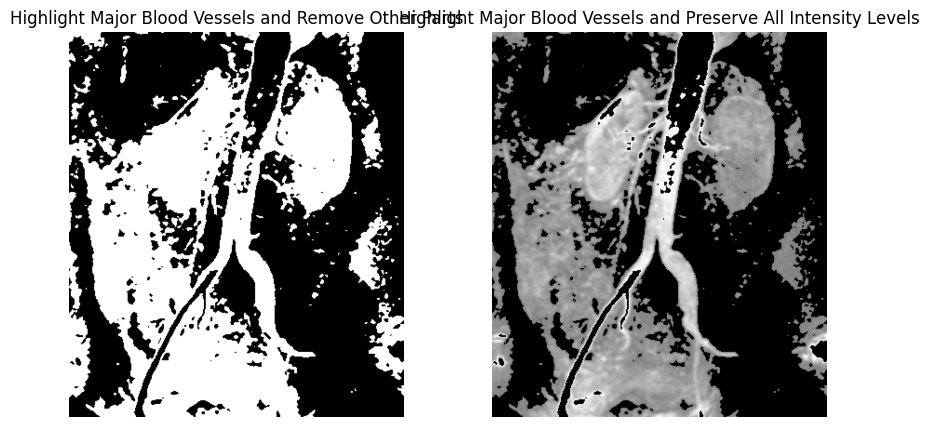

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
with open('/content/prob3.tif', 'rb') as f:
    img = np.array(Image.open(f))

# Define custom intensity-level slicing function
def custom_intensity_slicing(img, low_threshold, high_threshold, highlight=True):
    sliced_img = np.zeros_like(img)
    rows, cols = img.shape

    # Iterate through each pixel
    for i in range(rows):
        for j in range(cols):
            if low_threshold <= img[i, j] <= high_threshold:
                if highlight:
                    sliced_img[i, j] = 255  # Highlight major blood vessels
                else:
                    sliced_img[i, j] = img[i, j]  # Preserve all other intensity levels

    return sliced_img

# Task (a): Highlight major blood vessels and remove other parts
highlighted_img_a = custom_intensity_slicing(img, 100, 200, highlight=True)

# Task (b): Highlight major blood vessels and preserve all other intensity levels
highlighted_img_b = custom_intensity_slicing(img, 100, 200, highlight=False)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(highlighted_img_a, cmap='gray')
plt.title('Highlight Major Blood Vessels and Remove Other Parts')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(highlighted_img_b, cmap='gray')
plt.title('Highlight Major Blood Vessels and Preserve All Intensity Levels')
plt.axis('off')

plt.show()


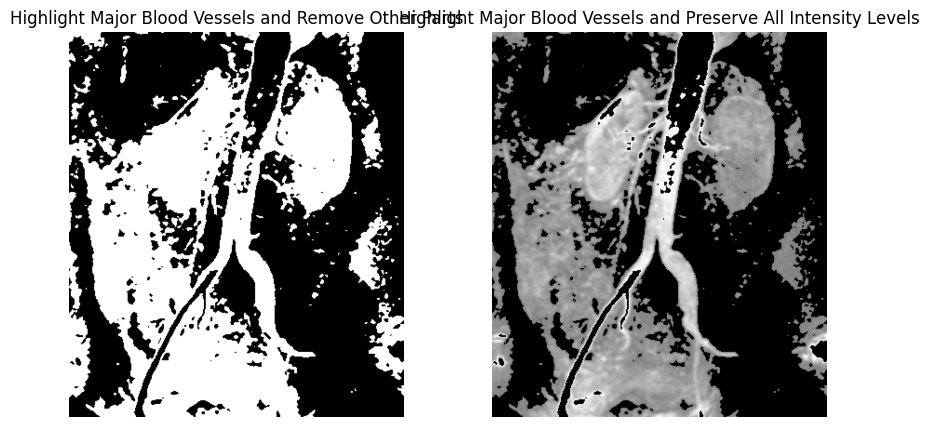

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the image
with open('/content/prob3.tif', 'rb') as f:
    img = Image.open(f)
    img_data = list(img.getdata())
    img_width, img_height = img.size

# Define custom intensity-level slicing function
def custom_intensity_slicing(image_data, width, height, low_threshold, high_threshold, highlight=True):
    sliced_img = []

    # Iterate through each pixel
    for i in range(height):
        for j in range(width):
            pixel_value = image_data[i * width + j]
            if low_threshold <= pixel_value <= high_threshold:
                if highlight:
                    sliced_img.append(255)  # Highlight major blood vessels
                else:
                    sliced_img.append(pixel_value)  # Preserve all other intensity levels
            else:
                sliced_img.append(0)  # Remove other parts

    return sliced_img

# Task (a): Highlight major blood vessels and remove other parts
highlighted_img_a = custom_intensity_slicing(img_data, img_width, img_height, 100, 200, highlight=True)

# Task (b): Highlight major blood vessels and preserve all other intensity levels
highlighted_img_b = custom_intensity_slicing(img_data, img_width, img_height, 100, 200, highlight=False)

# Convert the sliced images to PIL format for visualization
highlighted_img_a_pil = Image.new('L', (img_width, img_height))
highlighted_img_a_pil.putdata(highlighted_img_a)

highlighted_img_b_pil = Image.new('L', (img_width, img_height))
highlighted_img_b_pil.putdata(highlighted_img_b)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(highlighted_img_a_pil, cmap='gray')
plt.title('Highlight Major Blood Vessels and Remove Other Parts')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(highlighted_img_b_pil, cmap='gray')
plt.title('Highlight Major Blood Vessels and Preserve All Intensity Levels')
plt.axis('off')

plt.show()


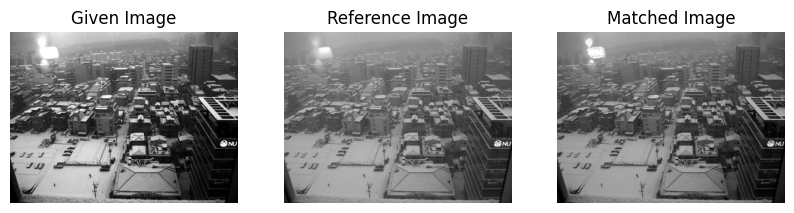

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the given image
with open('/content/prob4(a).jpg', 'rb') as f:
    given_img = np.array(Image.open(f).convert('L'))  # Convert to grayscale

# Load the reference image
with open('/content/prob4(b).jpg', 'rb') as f:
    reference_img = np.array(Image.open(f).convert('L'))  # Convert to grayscale

def histogram_matching(given_img, reference_img):
    # Compute histograms
    given_hist, _ = np.histogram(given_img.flatten(), bins=256, range=(0, 256))
    reference_hist, _ = np.histogram(reference_img.flatten(), bins=256, range=(0, 256))

    # Compute cumulative distribution functions (CDFs)
    given_cdf = given_hist.cumsum() / given_hist.sum()
    reference_cdf = reference_hist.cumsum() / reference_hist.sum()

    # Map intensity values of given image to match CDF of reference image
    matched_img = np.interp(given_img.flatten(), range(256), np.interp(given_cdf, reference_cdf, range(256)))
    matched_img = matched_img.reshape(given_img.shape)

    return matched_img

# Perform histogram matching
matched_img = histogram_matching(given_img, reference_img)

# Display the given image, reference image, and matched image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(given_img, cmap='gray')
plt.title('Given Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reference_img, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_img, cmap='gray')
plt.title('Matched Image')
plt.axis('off')

plt.show()


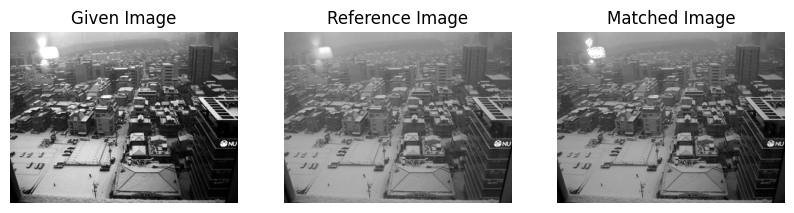

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the given image
with open('/content/prob4(a).jpg', 'rb') as f:
    given_img = np.array(Image.open(f).convert('L'))  # Convert to grayscale

# Load the reference image
with open('/content/prob4(b).jpg', 'rb') as f:
    reference_img = np.array(Image.open(f).convert('L'))  # Convert to grayscale

def compute_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram

def compute_cdf(histogram):
    cdf = np.zeros_like(histogram)
    cdf[0] = histogram[0]
    for i in range(1, len(histogram)):
        cdf[i] = cdf[i - 1] + histogram[i]
    return cdf / cdf.max()

def histogram_matching(given_img, reference_img):
    # Compute histograms
    given_hist = compute_histogram(given_img)
    reference_hist = compute_histogram(reference_img)

    # Compute cumulative distribution functions (CDFs)
    given_cdf = compute_cdf(given_hist)
    reference_cdf = compute_cdf(reference_hist)

    # Map intensity values of given image to match CDF of reference image
    matched_img = np.zeros_like(given_img)
    for i in range(len(given_img)):
        for j in range(len(given_img[0])):
            pixel_value = given_img[i, j]
            matched_img[i, j] = np.interp(given_cdf[pixel_value], reference_cdf, range(256))

    return matched_img.astype(np.uint8)

# Perform histogram matching
matched_img = histogram_matching(given_img, reference_img)

# Display the given image, reference image, and matched image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(given_img, cmap='gray')
plt.title('Given Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reference_img, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_img, cmap='gray')
plt.title('Matched Image')
plt.axis('off')

plt.show()


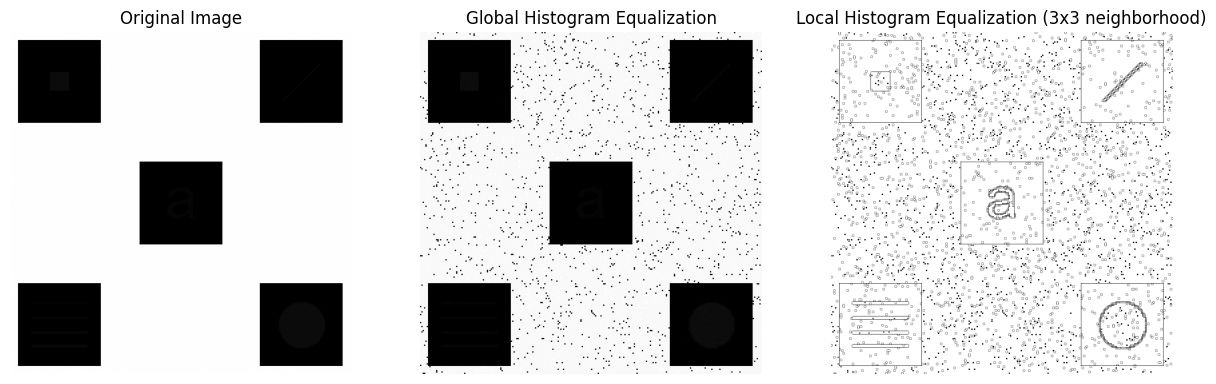

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the given image
with open('/content/prob5.tif', 'rb') as f:
    img = np.array(Image.open(f).convert('L'))  # Convert to grayscale

def compute_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram

def compute_cdf(histogram):
    cdf = np.zeros_like(histogram)
    cdf[0] = histogram[0]
    for i in range(1, len(histogram)):
        cdf[i] = cdf[i - 1] + histogram[i]
    return cdf / cdf.max()

def global_histogram_equalization(image):
    # Compute histogram
    histogram = compute_histogram(image)

    # Compute cumulative distribution function (CDF)
    cdf = compute_cdf(histogram)

    # Apply histogram equalization
    equalized_image = np.interp(image.flatten(), range(256), cdf * 255).reshape(image.shape)

    return equalized_image.astype(np.uint8)

def local_histogram_equalization(image, neighborhood_size=(3, 3)):
    # Compute image padding size
    pad_size = neighborhood_size[0] // 2

    # Pad the image
    padded_image = np.pad(image, pad_size, mode='edge')

    # Initialize the equalized image
    equalized_image = np.zeros_like(image)

    # Iterate over each pixel in the original image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the neighborhood
            neighborhood = padded_image[i:i+neighborhood_size[0], j:j+neighborhood_size[1]]

            # Compute the histogram and CDF of the neighborhood
            neighborhood_histogram = compute_histogram(neighborhood)
            neighborhood_cdf = compute_cdf(neighborhood_histogram)

            # Compute the new pixel value using local histogram equalization
            new_pixel_value = neighborhood_cdf[image[i, j]] * 255

            # Update the pixel value in the equalized image
            equalized_image[i, j] = new_pixel_value

    return equalized_image.astype(np.uint8)

# Perform global histogram equalization
global_equalized_img = global_histogram_equalization(img)

# Perform local histogram equalization
local_equalized_img = local_histogram_equalization(img)

# Display the original image, globally equalized image, and locally equalized image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_equalized_img, cmap='gray')
plt.title('Global Histogram Equalization')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(local_equalized_img, cmap='gray')
plt.title('Local Histogram Equalization (3x3 neighborhood)')
plt.axis('off')

plt.show()


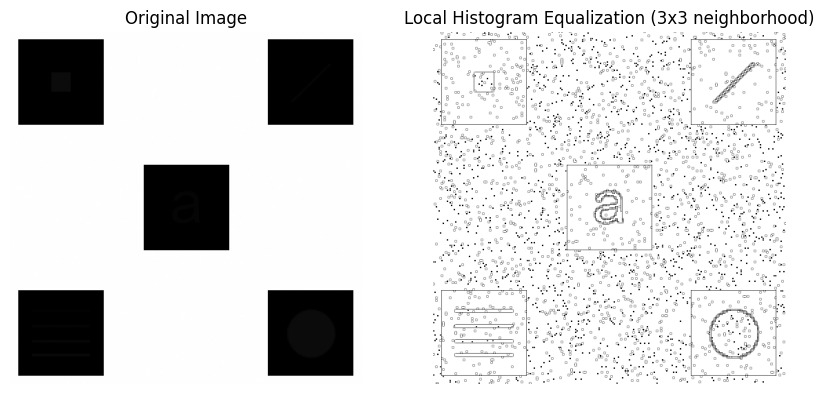

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the given image
with open('/content/prob5.tif', 'rb') as f:
    img = np.array(Image.open(f).convert('L'))  # Convert to grayscale

def compute_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram

def compute_cdf(histogram):
    cdf = np.zeros_like(histogram)
    cdf[0] = histogram[0]
    for i in range(1, len(histogram)):
        cdf[i] = cdf[i - 1] + histogram[i]
    return cdf / cdf.max()

def local_histogram_equalization(image, neighborhood_size=(3, 3)):
    padded_image = np.pad(image, (1, 1), mode='edge')  # Pad the image

    # Compute local histogram equalization
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+3, j:j+3]  # Get the 3x3 neighborhood
            histogram = compute_histogram(neighborhood)
            cdf = compute_cdf(histogram)
            equalized_image[i, j] = cdf[image[i, j]] * 255

    return equalized_image.astype(np.uint8)

# Perform local histogram equalization
local_equalized_img = local_histogram_equalization(img)

# Display the original image and locally equalized image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(local_equalized_img, cmap='gray')
plt.title('Local Histogram Equalization (3x3 neighborhood)')
plt.axis('off')

plt.show()
